In [2]:
import pandas as pd

In [34]:
df = pd.read_csv('./Reviews.csv')
df = df[['Text', 'Score']]
df = df.sample(frac=0.2)
df['Score'] = df['Score'].astype(str)
df.head()

,Text,Score
125213,Say what you will about Mint Mentos but they a...,4
409972,This cider has a very nice and sweet taste. Wh...,5
310380,I bought several of the Kind bar flavors and t...,2
73137,I have tried many Erin Baker cookies and have ...,5
201800,Haven't found a whole wheat pasta you like? W...,5


In [35]:
len(df)

113691

In [36]:
import datawig
df_train, df_test = datawig.utils.random_split(df)

In [37]:
import datawig

#Initialize a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns=['Text'], # column(s) containing information about the column we want to impute
    output_column='Score', # the column we'd like to impute values for
    num_hash_buckets=1024
)

#Fit an imputer model on the train data
imputer.fit(train_df=df_train)

#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df_test)

2020-02-01 21:35:56,742 [INFO]  
========== start: fit model
2020-02-01 21:35:56,749 [WARNING]  Already bound, ignoring bind()
2020-02-01 21:35:58,655 [INFO]  Epoch[0] Batch [2558]	Speed: 21542.73 samples/sec	cross-entropy=0.956901	Score-accuracy=0.645369
2020-02-01 21:36:00,576 [INFO]  Epoch[0] Train-cross-entropy=0.869133
2020-02-01 21:36:00,577 [INFO]  Epoch[0] Train-Score-accuracy=0.660002
2020-02-01 21:36:00,578 [INFO]  Epoch[0] Time cost=3.826
2020-02-01 21:36:00,582 [INFO]  Saved checkpoint to "score/model-0000.params"
2020-02-01 21:36:00,943 [INFO]  Epoch[0] Validation-cross-entropy=0.870670
2020-02-01 21:36:00,945 [INFO]  Epoch[0] Validation-Score-accuracy=0.666740
2020-02-01 21:36:03,057 [INFO]  Epoch[1] Batch [2558]	Speed: 19413.05 samples/sec	cross-entropy=0.839581	Score-accuracy=0.671014
2020-02-01 21:36:05,042 [INFO]  Epoch[1] Train-cross-entropy=0.822870
2020-02-01 21:36:05,044 [INFO]  Epoch[1] Train-Score-accuracy=0.676525
2020-02-01 21:36:05,045 [INFO]  Epoch[1] Time c

2020-02-01 21:37:00,968 [INFO]  Epoch[14] Time cost=3.774
2020-02-01 21:37:00,972 [INFO]  Saved checkpoint to "score/model-0014.params"
2020-02-01 21:37:01,325 [INFO]  No improvement detected for 5 epochs compared to 0.8201697274963969 last error obtained: 0.821013314076593, stopping here
2020-02-01 21:37:01,326 [INFO]  
========== done (64.58504295349121 s) fit model


In [38]:
imputed.head()

,Text,Score,Score_imputed,Score_imputed_proba
129367,"DISGUSTING, RANCID AND UNRETURNABLE ""FOOD"" PRO...",1,1,0.997988
184095,"There's really nothing wrong with the caps, as...",3,1,0.399915
245943,"Fantastic product, just as stated. Not disappo...",5,5,0.640273
511846,We previously bought Bragg's similar product -...,5,5,0.538741
368387,This is the best beef jerky that I have found ...,5,5,0.844313


In [39]:
from sklearn.metrics import classification_report

print(classification_report(imputed.Score, imputed.Score_imputed))

              precision    recall  f1-score   support

           1       0.47      0.53      0.50      2000
           2       0.36      0.08      0.14      1198
           3       0.34      0.19      0.24      1701
           4       0.38      0.13      0.19      3201
           5       0.75      0.93      0.83     14638

   micro avg       0.68      0.68      0.68     22738
   macro avg       0.46      0.37      0.38     22738
weighted avg       0.62      0.68      0.63     22738



In [3]:
df_tmp = pd.read_csv('./reviews_embedded.csv')

In [4]:
len(df_tmp)

284227

In [44]:
284227*0.2

56845.4

In [12]:
num_tuples_test = 10000

# Load data
df_tmp = pd.read_csv('./reviews_embedded.csv')

# Test data
df_tmp.head(num_tuples_test).to_csv('./reviews_embedded_test.csv', index=False)

# Train data
df_tmp.tail(len(df_tmp) - num_tuples_test).to_csv('./reviews_embedded_train.csv', index=False)

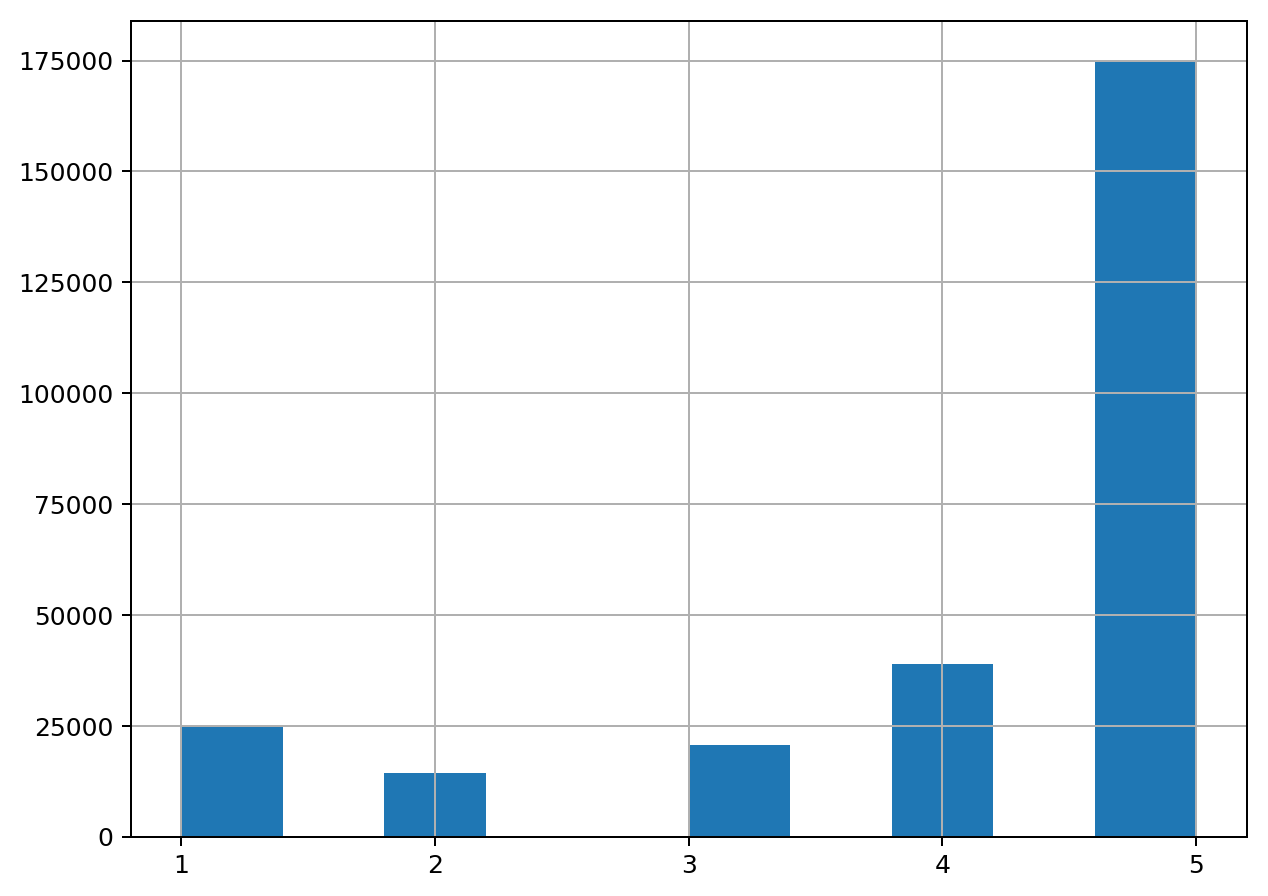

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, ylim, xticks

figure(num=None, figsize=(8, 6), dpi=180, facecolor='w', edgecolor='k')
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
xticks(np.arange(1, 6, step=1))


df_tmp = pd.read_csv('./reviews_embedded_train.csv')
df_tmp['Score'].hist()

In [13]:
len(df_tmp)

274227